In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

## Comparing the ocurrence of optimal tree among estimated champion trees

In [108]:
paths = ['../../simulation_study/instances/model1_csz_200_off0/results',
'../../simulation_study/instances/model1_perl_200_off0/results'
]
paths = [os.path.abspath(x) for x in paths]
methods = ['smc']
models = ['model1', 'model2']
sizes = [5000, 10000, 20000]
#sizes = [5000]
correct_model = '000 1 10 100'

def get_results(fld, method, model_name, size):
    file = '%s/%s/%s_%s.csv' % (fld, method, model_name, size)
    df = pd.read_csv(file)    
    df.tree = df.tree.astype(str).map(lambda t: ' '.join(sorted(t.split())))
    return df

def correct_found_num(fld, model_name, sz):
    def correct_found_num2(method):
        xx = get_results(fld, method, model_name, sz)
        return len(xx[(xx.tree==correct_model) & (xx.opt == 1)])
    return correct_found_num2

def compare_optimal_tree_occurrence(model_name):
    methods2 = [m + '_detec' for m in methods]    
    df = pd.DataFrame(columns= ['instance', 'model', 'sample_size'] + methods + methods2)
    for fld in paths:           
        inst = fld.split('/')[-2]
        for size in sizes:
            arr = [(get_results(fld, method, model_name, size).tree==correct_model).astype(int).sum() for method in methods]
            arr2 = list(map(correct_found_num(fld, model_name, size), methods))
            df.loc[len(df)] = ([inst, model_name, size] + arr + arr2)
    return df.sort_values(['instance', 'model', 'sample_size'])

### Model 1

In [110]:
model1 = compare_optimal_tree_occurrence('model1')
model1

,instance,model,sample_size,smc,smc_detec
0,model1_csz_200_off0,model1,5000,88,30
1,model1_csz_200_off0,model1,10000,90,43
2,model1_csz_200_off0,model1,20000,97,82
3,model1_perl_200_off0,model1,5000,88,30
4,model1_perl_200_off0,model1,10000,90,41
5,model1_perl_200_off0,model1,20000,97,79


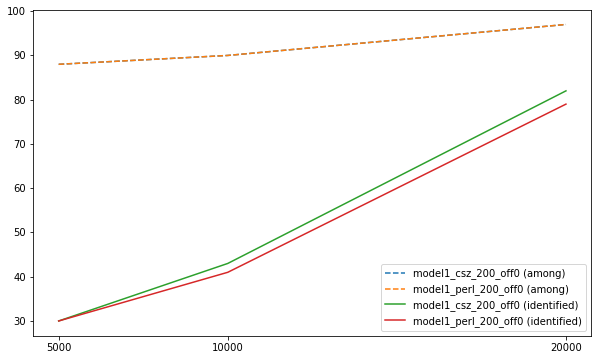

,instance,model,sample_size,smc,smc_detec
3,model1_perl_200_off0,model1,5000,88,30
4,model1_perl_200_off0,model1,10000,90,41
5,model1_perl_200_off0,model1,20000,97,79


In [111]:
instances = list(model1.instance.unique())
df = model1

plt.figure(figsize=(22,6))
fld = 'smc'   
plt.subplot(1, 2, 1)
for instance in instances:    
    m = df[df.instance==instance]
    plt.plot(m.sample_size, m['smc'], '--', label=instance + ' (among)')
    plt.xticks([5000, 10000, 20000])
for instance in instances:    
    m = df[df.instance==instance]
    plt.plot(m.sample_size, m['smc_detec'], label=instance + ' (identified)')
    plt.xticks([5000, 10000, 20000])
    plt.legend()
plt.show()
    #m = df[df.instance==instance]
m

In [ ]:

def plot_model(model, methods):
    plt.figure(figsize=(10,6))
    for m in methods:
        plt.plot(model.sample_size, model[m], label=m)
    plt.xticks([5000, 10000, 20000])
    plt.ylabel('Optimal trees found among champion trees (%)')
    plt.xlabel('Resamples size')
    plt.legend()
    plt.show()
    
plot_model(model1, methods)

### Model 2

In [27]:
model2 = compare_optimal_tree_occurrence('model2')
model2

FileNotFoundError: [Errno 2] No such file or directory: '/home/arthur/Documents/Neuromat/projects/SMC/smallest_maximizer_criterion/examples/simulation_study/instances/model2_perl_200_off0/results/smc/model2_5000.csv'

In [17]:
plot_model(model2, methods)

NameError: name 'model2' is not defined

In [6]:
def correct_found_num(model_name, sz):
    def correct_found_num2(method):
        xx = get_results(method, model_name, sz)
        return len(xx[(xx.tree==correct_model) & (xx.opt == 1)])
    return correct_found_num2
list(map(correct_found_num('model1', 5000), ['smc', 'prune']))

[40, 25]

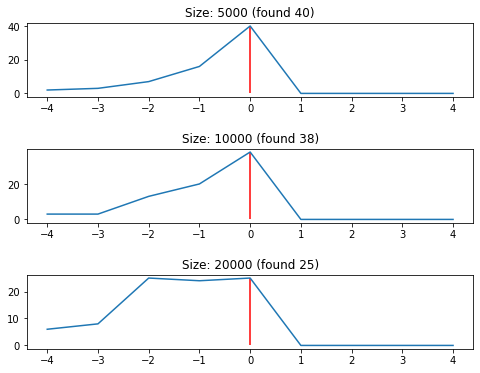

Metodo novo


In [7]:
x = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace=0.7)
for i, sz in enumerate([5000, 10000, 20000]):
    df = get_results('smc', 'model1', sz)
    plt.subplot(3, 1, i+1)
    y = [df[(df.tree==correct_model) & (df.tree_idx==df.opt_idx-xx)].count().tree for xx in x]
    vl = df[(df.tree==correct_model) & (df.tree_idx==df.opt_idx)].count().tree
    plt.title('Size: %s (found %s)' % (sz, vl))
    plt.plot(x, y)    
    plt.vlines([0], 0, max(y), color='r')
plt.show()
print("Metodo novo")

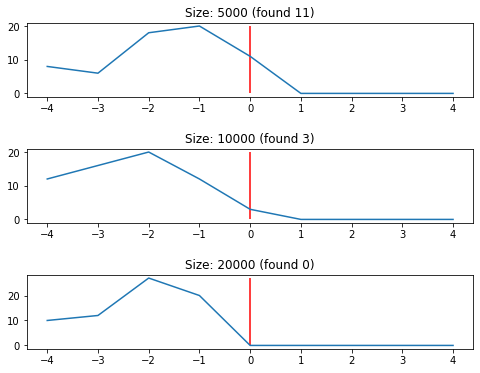

Metodo novo


In [29]:
x = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace=0.7)
for i, sz in enumerate([5000, 10000, 20000]):
    df = get_results('prune', 'model2', sz)
    plt.subplot(3, 1, i+1)
    y = [df[(df.tree==correct_model) & (df.tree_idx==df.opt_idx-xx)].count().tree for xx in x]
    vl = df[(df.tree==correct_model) & (df.tree_idx==df.opt_idx)].count().tree
    plt.title('Size: %s (found %s)' % (sz, vl))
    plt.plot(x, y)    
    plt.vlines([0], 0, max(y), color='r')
plt.show()
print("Metodo novo")